### Final NN4 Model & Its Confusion Matrix

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

model_nn4 = Sequential()
model_nn4.add(Dense(42, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))  # Input layer
model_nn4.add(Dropout(0))
model_nn4.add(Dense(22, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))  # hidden layer 1
model_nn4.add(Dropout(0.2))
model_nn4.add(Dense(7, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))   # hidden layer 2
model_nn4.add(Dropout(0.4))
model_nn4.add(Dense(48, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))  # hidden layer 3
model_nn4.add(Dropout(0.1))
model_nn4.add(Dense(50, activation='tanh', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))  # hidden layer 4
model_nn4.add(Dropout(0.3))
model_nn4.add(Dense(1, activation='sigmoid'))  # Output layer
model_nn4.compile(loss=BinaryCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[f1, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model_nn4.fit(X_train, y_train, epochs=100)

              precision    recall  f1-score   support

           0       0.82      0.62      0.71    104291
           1       0.43      0.68      0.53     43705

    accuracy                           0.64    147996
   macro avg       0.63      0.65      0.62    147996
weighted avg       0.71      0.64      0.66    147996



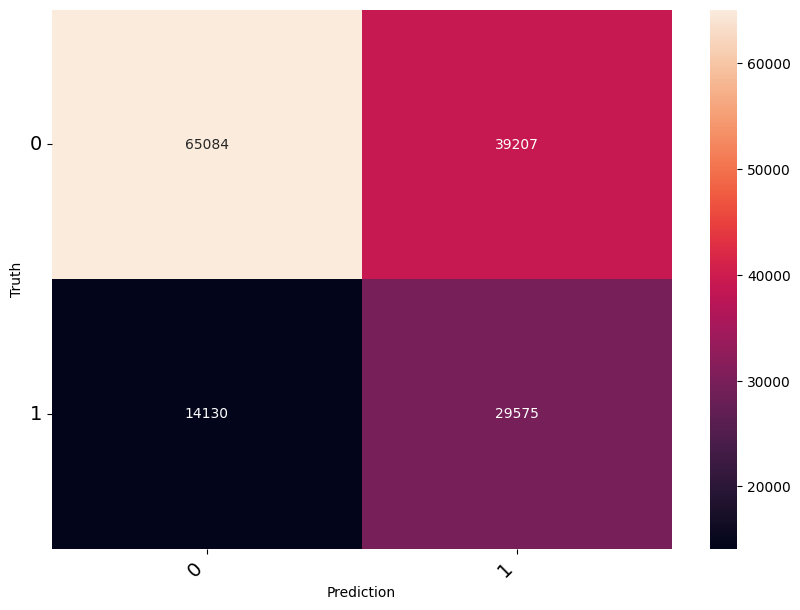

In [48]:
y_pred_prob_nn4 = model_nn4.predict(X_test)
y_pred_nn4 = np.where(y_pred_prob_nn4 > 0.5, 1, 0)[:, 0]
confusion_matrixs = confusion_matrix(y_test,y_pred_nn4)
print_confusion_matrix(confusion_matrixs,['0','1'])
print(classification_report(y_test,y_pred_nn4))

### Prediction Probability Distribution Plot of Final NN4 Model

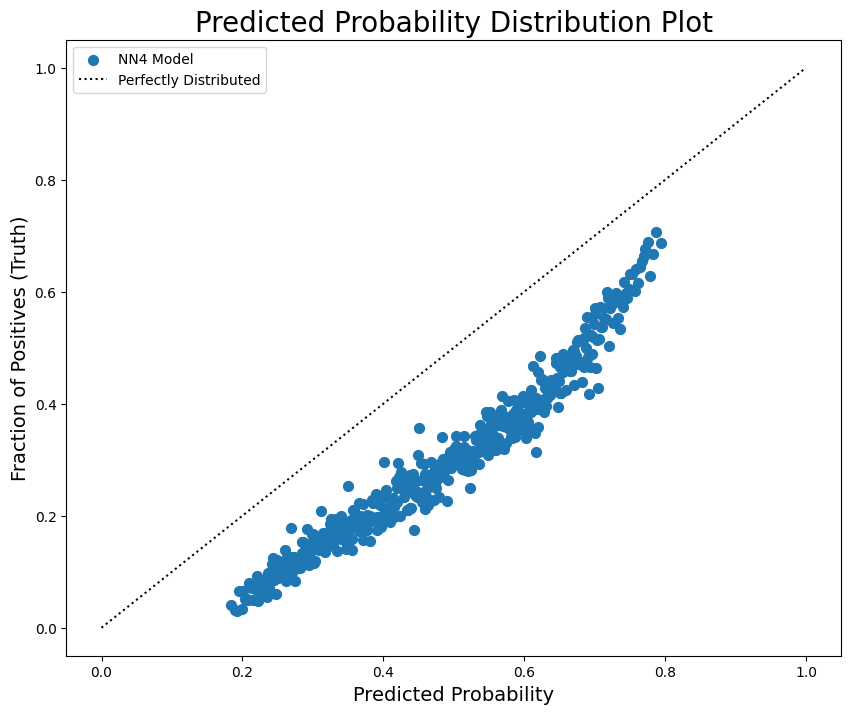

In [193]:
predicted_prob = model_nn4.predict(X_validation)
probability = pd.DataFrame(y_validation)
probability.columns= ['truth']
probability['predicted_prob'] = predicted_prob
plot_distribution_predictions(y_proba_pred=probability['predicted_prob'],y_true=probability['truth'],labels='NN4 Model',x_bins=500)